Sentiment Distribution (%):
 sentiment
Positive    40.289766
Neutral     35.450062
Negative    24.260173
Name: proportion, dtype: float64


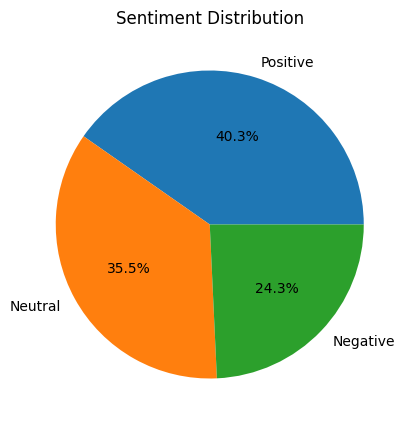

In [3]:
# Replace 'ola.json' with your actual file path if needed
# Data handling
import json
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment analysis (TextBlob)
# !pip install textblob --quiet  # run this only once in a notebook cell to install
from textblob import TextBlob

# For handling the mode calculation
from statistics import mode

# (Optional) to suppress warnings in a notebook
import warnings
warnings.filterwarnings('ignore')
file_path = 'ola.json'
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)
def get_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['polarity'] =df['content'].apply(get_polarity)
# df['content'].apply(get_polarity)
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(categorize_sentiment)
sentiment_dist = df['sentiment'].value_counts(normalize=True) * 100
print("Sentiment Distribution (%):\n", sentiment_dist)

# (Optional) You could plot this distribution as a pie chart
sentiment_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), title="Sentiment Distribution")
plt.ylabel("")  # hide the y-label
plt.show()